In [1]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline
#pd.set_option("display.max_rows", None, "display.max_columns", None)

Populating the interactive namespace from numpy and matplotlib


## Question 1

In [2]:
gold = pd.read_csv('gold.txt', sep="\t", names=["url", "category"])
labels =  pd.read_csv('labels.txt', sep="\t", names=["turk","url", "category"])
display(labels,gold)

,turk,url,category
0,A1OT3A29R9N1DG,http://000.cc,P
1,A1PXXEOGQ76RNJ,http://000.cc,G
2,A1PXXEOGQ76RNJ,http://000.cc,G
3,A21US576U8SCO4,http://000.cc,G
4,A2LGX47NN7C5D3,http://000.cc,G
...,...,...,...
92716,AFHMR93GDJCGT,http://zz868.com,G
92717,A13F119AMOA54H,http://zzx.cc,X
92718,A1S0C0EB7A6FFM,http://zzx.cc,P
92719,A21US576U8SCO4,http://zzx.cc,G


,url,category
0,http://0800-horoscope.com,G
1,http://18games.net,X
2,http://1pixelout.net,G
3,http://1porno.com/004/teens/index.html,X
4,http://1stpussy.com/005/16/index.html,X
...,...,...
1512,http://zipcodez.com,G
1513,http://zml.com,P
1514,http://zonezero.com,G
1515,http://zooped.com,R


## Question 2

In [3]:
labels_on_gold = labels[labels['url'].isin(gold['url'])]
labels_unknown  = labels[~labels['url'].isin(gold['url'])]
display(labels_on_gold, labels_unknown)

,turk,url,category
245,A1253FXHCZ9CWM,http://0800-horoscope.com,G
246,A153PKAL7OAY36,http://0800-horoscope.com,G
247,A1FV9SAPL5C6KY,http://0800-horoscope.com,G
248,A1JTOT0DWM6QGL,http://0800-horoscope.com,G
249,A1PXXEOGQ76RNJ,http://0800-horoscope.com,G
...,...,...,...
91766,A35CBDDGBM7T6E,http://yousendit.com,G
91767,A3J86MK3VIE6ST,http://yousendit.com,G
91768,A4GP97LAQCCHJ,http://yousendit.com,G
91769,AAQNUEUU7H1Y5,http://yousendit.com,G


,turk,url,category
0,A1OT3A29R9N1DG,http://000.cc,P
1,A1PXXEOGQ76RNJ,http://000.cc,G
2,A1PXXEOGQ76RNJ,http://000.cc,G
3,A21US576U8SCO4,http://000.cc,G
4,A2LGX47NN7C5D3,http://000.cc,G
...,...,...,...
92716,AFHMR93GDJCGT,http://zz868.com,G
92717,A13F119AMOA54H,http://zzx.cc,X
92718,A1S0C0EB7A6FFM,http://zzx.cc,P
92719,A21US576U8SCO4,http://zzx.cc,G


## Question 3

In [4]:
gl_merge = gold.merge(labels_on_gold, left_on = ['url'], right_on = ['url'], suffixes = ['_g','_l'])
correct_t = gl_merge[gl_merge['category_g'] == gl_merge['category_l']]['turk'].value_counts().to_frame(name = 'Avg Correctness')
numb_r = gl_merge['turk'].value_counts().to_frame(name = 'Number of Ratings')
rater_goodness = numb_r.merge(correct_t,how = 'left',left_on = numb_r.index, right_on = correct_t.index).set_index('key_0')
rater_goodness.rename_axis(None,inplace = True)
rater_goodness['Avg Correctness'].fillna(0,inplace = True)
rater_goodness.loc[:,'Avg Correctness'] = rater_goodness['Avg Correctness']/rater_goodness['Number of Ratings']

In [5]:
#rater_goodness = pd.DataFrame(columns = ['Number of Ratings', 'Avg Correctness'],index =gl_merge['turk'].value_counts().index.tolist())
#rater_goodness['Number of Ratings'] = gl_merge['turk'].value_counts().tolist()
display(rater_goodness)

,Number of Ratings,Avg Correctness
A31OCN4MNHUQ6W,184,0.777174
A153PKAL7OAY36,148,0.722973
A2BTR0GQ5B5JI6,126,0.523810
ATVALOQVDCMZW,103,0.854369
AZSDW7JJL5VA7,100,0.680000
...,...,...
A112DVP1KG4QZU,1,1.000000
A2EG8FHODTEV63,1,0.000000
A1D0ITFKRWUYKZ,1,0.000000
AJ8O44SR8ELPA,1,1.000000


## Question 4

In [6]:
rater_goodness['odds'] = (rater_goodness['Avg Correctness']/(1.001-rater_goodness['Avg Correctness']))
rater_goodness

,Number of Ratings,Avg Correctness,odds
A31OCN4MNHUQ6W,184,0.777174,3.472222
A153PKAL7OAY36,148,0.722973,2.600369
A2BTR0GQ5B5JI6,126,0.523810,1.097695
ATVALOQVDCMZW,103,0.854369,5.826657
AZSDW7JJL5VA7,100,0.680000,2.118380
...,...,...,...
A112DVP1KG4QZU,1,1.000000,1000.000000
A2EG8FHODTEV63,1,0.000000,0.000000
A1D0ITFKRWUYKZ,1,0.000000,0.000000
AJ8O44SR8ELPA,1,1.000000,1000.000000


## Question 5

In [7]:
rater_goodness[rater_goodness['Number of Ratings'] >= 20].sort_values('Avg Correctness',ascending = False).head(10)

,Number of Ratings,Avg Correctness,odds
A2U0R4X38GUKZE,20,0.950000,18.627451
A22C0PJUBFJTI0,36,0.916667,10.869565
A23YQUBXZPKILZ,24,0.875000,6.944444
ATVALOQVDCMZW,103,0.854369,5.826657
A1HIXWH4OXT8S4,40,0.825000,4.687500
A3220HG1O83HQ4,22,0.818182,4.475385
A20PWAB7G3HDHU,20,0.800000,3.980100
A32W20KGQXS0LL,25,0.800000,3.980100
AJSJVK40F5HM6,28,0.785714,3.649635
A31OCN4MNHUQ6W,184,0.777174,3.472222


## Question 6

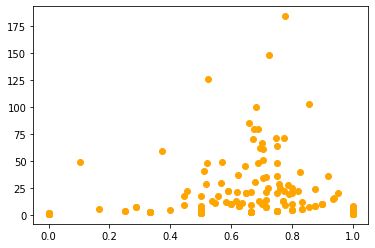

In [8]:
#There are no relationships?
scatter(rater_goodness['Avg Correctness'], rater_goodness['Number of Ratings'], color='orange')

## Question 7

In [23]:
reliable = rater_goodness[rater_goodness['Number of Ratings'] > rater_goodness['Number of Ratings'].quantile(q=0.75)]
reliable_labels = labels_unknown.merge(reliable, left_on = ['turk'],right_on = reliable.index)
overall_odds = reliable_labels.groupby(['url','category'])[['odds']].prod().reset_index()
overall_odds

,url,category,odds
0,http://0-101.net,G,2.155963
1,http://000.cc,G,1.460583
2,http://0000.jp,G,14.488244
3,http://000relationships.com,G,5.681060
4,http://000relationships.com,P,1.851852
...,...,...,...
13978,http://zynga.com,G,3.704611
13979,http://zz868.com,G,1.047852
13980,http://zz868.com,P,1.851852
13981,http://zzx.cc,G,1.330229


## Question 8

In [29]:
'''
result_75 = pd.DataFrame(columns = ['top category', 'top odds'], index=overall_odds['url'].value_counts().index.tolist())
for i, row in result_75.iterrows():
    ind = overall_odds[overall_odds['url'] == i]['odds'].idxmax()
    row['top odds'] = overall_odds[overall_odds['url'] == i]['odds'].max()
    row['top category'] = overall_odds[overall_odds.index == ind]['category'].values.tolist()[0]
'''

,top category,top odds
http://body-n-mind.com,NaN,NaN
http://bustycats.com,NaN,NaN
http://x-worx.com,NaN,NaN
http://esa.co.za,NaN,NaN
http://exclusivepussy.com,NaN,NaN
...,...,...
http://sellsta.com,NaN,NaN
http://icontact.com,NaN,NaN
http://tryren.com,NaN,NaN
http://76662.com,NaN,NaN


In [47]:
result_75 = overall_odds.sort_values(by ='odds',ascending = False).drop_duplicates(subset='url')
result_75.rename(columns = {'category': 'top category','odds':'top odds'},inplace = True)
result_75.set_index(result_75['url'],inplace=True)
result_75.drop('url',axis = 1,inplace= True)
result_75.rename_axis(None, inplace = True)
result_75

,top category,top odds
http://affiliatetips.com,G,1.631168e+06
http://daniweb.com,G,8.486887e+05
http://asiaporno.com,X,5.632515e+05
http://directmag.com,G,4.238277e+05
http://directline-holidays.co.uk,G,4.238277e+05
...,...,...
http://nobiva2008.org,G,1.047852e+00
http://sevgilimol.com,G,1.047852e+00
http://wedatefree.com,G,1.047852e+00
http://herpesonline.org,G,1.047852e+00


## Question 9

In [48]:
reliable2 =rater_goodness[rater_goodness['Number of Ratings'] > rater_goodness['Number of Ratings'].quantile(q=0.25)]
reliable_labels2 = labels_unknown.merge(reliable2, left_on = ['turk'],right_on = reliable2.index)
overall_odds2 = reliable_labels2.groupby(['url','category'])[['odds']].prod().reset_index()
overall_odds2

,url,category,odds
0,http://0-101.net,G,2.155963e+00
1,http://000.cc,G,2.181050e+03
2,http://000.cc,P,9.980040e-01
3,http://0000.jp,G,2.877556e+07
4,http://000relationships.com,G,0.000000e+00
...,...,...,...
16685,http://zz868.com,G,1.209566e+13
16686,http://zz868.com,P,1.851852e+00
16687,http://zzx.cc,G,1.330229e+00
16688,http://zzx.cc,P,9.980040e-01


In [50]:
result_25 = overall_odds2.sort_values(by ='odds',ascending = False).drop_duplicates(subset='url')
result_25.rename(columns = {'category': 'top category','odds':'top odds'},inplace = True)
result_25.set_index(result_25['url'],inplace=True)
result_25.drop('url',axis = 1,inplace= True)
result_25.rename_axis(None, inplace = True)
result_25

,top category,top odds
http://zz868.com,G,1.209566e+13
http://hulashare.com,G,2.534880e+12
http://kejuaodo.com,G,1.265542e+12
http://hqmaturetube.com,X,1.000000e+12
http://candlecharts.com,G,9.182688e+11
...,...,...
http://pkdesign.sk,G,0.000000e+00
http://iask.com,G,0.000000e+00
http://at15.com,G,0.000000e+00
http://at160.com,G,0.000000e+00


In [57]:
merge_result = result_75.merge(result_25,left_on = result_75.index,right_on = result_25.index,suffixes = ['_75','_25'])
merge_result.rename(columns = {'key_0': 'url'},inplace = True)
result_matrix = pd.crosstab(merge_result['top category_75'],merge_result['top category_25'])
result_matrix

top category_25,G,P,R,X
top category_75,,,,
G,8327,572,186,217
P,189,329,47,19
R,21,34,127,26
X,27,6,26,457
